**CNN from Scratch on CIFAR-10**

In [ ]:
import tensorflow as tf
from keras import layers, Model
from keras.datasets import cifar10
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import AdamW
import matplotlib.pyplot as plt

# 1. Load and preprocess CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [ ]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


inputs = tf.keras.Input(shape=(32, 32, 3))

# Block 1
x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 2
x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 3
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Classifier
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = Model(inputs, outputs)

In [ ]:
optimizer = AdamW(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# 4. Callbacks
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)
early_stop = EarlyStopping(
    patience=3, restore_best_weights=True, monitor="val_accuracy", min_delta=0.001
)

# 5. Train the model
history = model.fit(
    train_images,
    train_labels,
    validation_split=0.2,
    epochs=25,
    batch_size=128,
    callbacks=[lr_scheduler, early_stop],
    verbose=1,
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 220s 695ms/step - accuracy: 0.3102 - loss: 2.3448 - val_accuracy: 0.0980 - val_loss: 12.8267 - learning_rate: 5.0000e-04
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 218s 695ms/step - accuracy: 0.4999 - loss: 1.4500 - val_accuracy: 0.4093 - val_loss: 2.0407 - learning_rate: 5.0000e-04
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 261s 693ms/step - accuracy: 0.5861 - loss: 1.1786 - val_accuracy: 0.6124 - val_loss: 1.1273 - learning_rate: 5.0000e-04
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 260s 684ms/step - accuracy: 0.6423 - loss: 1.0207 - val_accuracy: 0.6441 - val_loss: 1.0543 - learning_rate: 5.0000e-04
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 694ms/step - accuracy: 0.6776 - loss: 0.9143 - val_accuracy: 0.6947 - val_loss: 0.8708 - learning_rate: 5.0000e-04
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 249s 653ms/step - accuracy: 0.7012 - loss: 0.8480 - val_accuracy: 0.6604 - val_loss: 1.0162 - learning_rate: 5.0000e-04
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nCNN Test Accuracy: {test_acc:.4f}")


CNN Test Accuracy: 0.8165


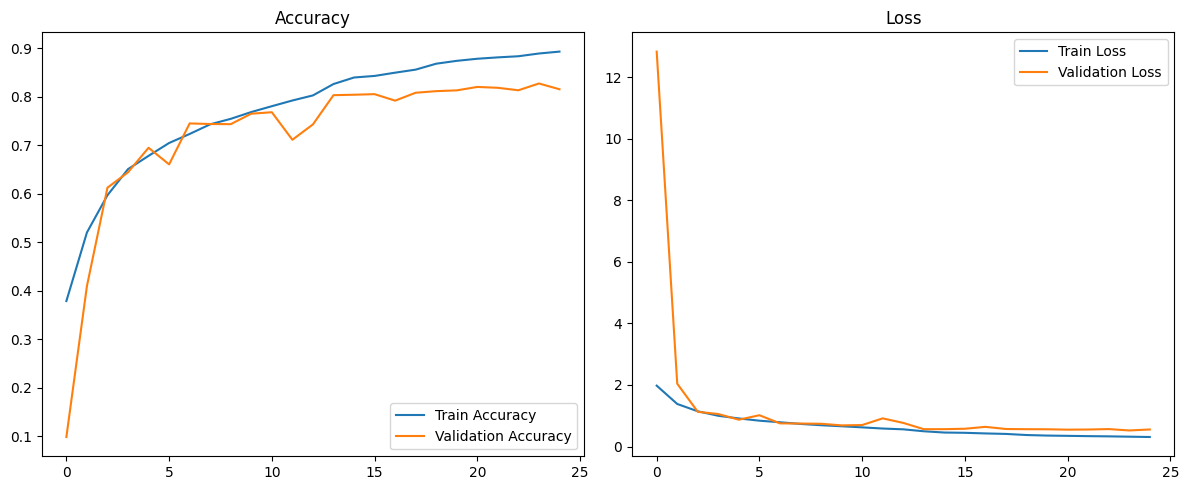

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Loss")

plt.tight_layout()
plt.show()

ResNet50 Transfer Learning on CIFAR-**10**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train[..., tf.newaxis]  # (28, 28, 1)
x_test = x_test[..., tf.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Dataset pipeline
BATCH_SIZE = 64
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_accuracy')
lr_reduce = ReduceLROnPlateau(patience=2, factor=0.5, monitor='val_accuracy', min_lr=1e-6, verbose=1)

# Train
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 230s 240ms/step - accuracy: 0.6791 - loss: 0.9457 - val_accuracy: 0.8478 - val_loss: 0.4186 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 224s 239ms/step - accuracy: 0.8385 - loss: 0.4519 - val_accuracy: 0.8736 - val_loss: 0.3497 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 226s 241ms/step - accuracy: 0.8669 - loss: 0.3736 - val_accuracy: 0.8751 - val_loss: 0.3458 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 223s 238ms/step - accuracy: 0.8778 - loss: 0.3412 - val_accuracy: 0.8897 - val_loss: 0.3187 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 260s 237ms/step - accuracy: 0.8857 - loss: 0.3164 - val_accuracy: 0.8704 - val_loss: 0.3549 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.8948 - loss: 0.2927
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
938/938 ━━━━━━━━━━━━━━━━━━━━ 223s 238ms/step - accuracy: 0.8948 - l

In [5]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


Final Test Accuracy: 92.33%


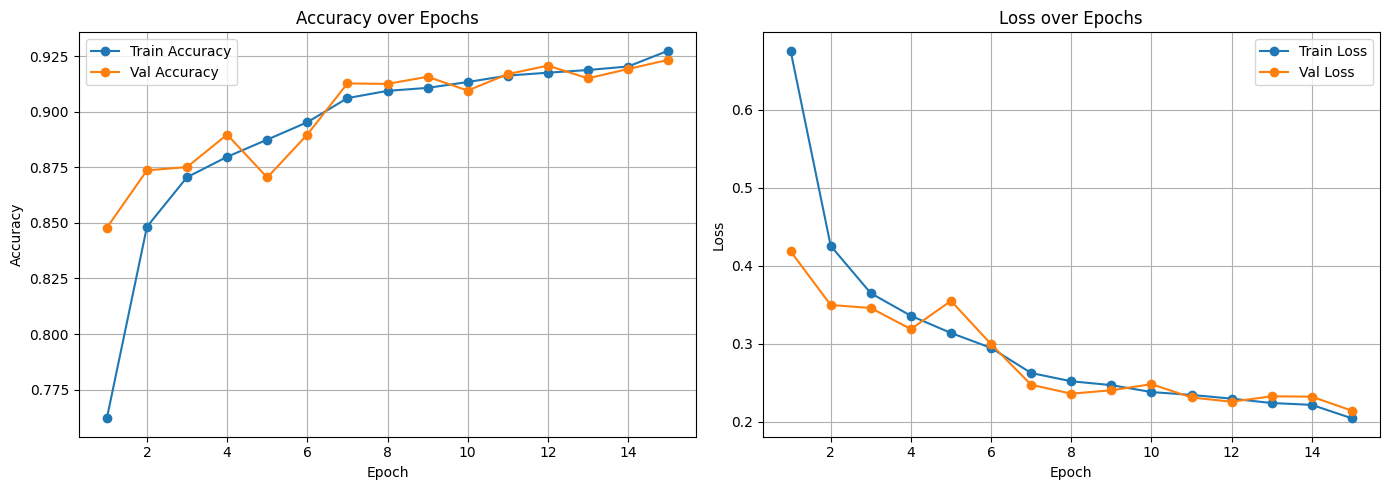

In [4]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss', marker='o')
    plt.plot(epochs_range, val_loss, label='Val Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot it
plot_training(history)
